In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as sts

In [3]:
data_base_path = "Data/"

cormat_1h = np.load(data_base_path + "cormat_1h.npy")
cormat_1m = np.load(data_base_path + "cormat_1m.npy")

print("Loading is done")

## thread unsafe
figure_uni_index=0
def new_figure():
    global figure_uni_index
    figure_uni_index = figure_uni_index + 1
    fig = plt.figure(figure_uni_index)
    return fig


Loading is done


In [65]:
def lambda_min_max(Q):
    lambda_min = 1 + 1 / Q - 2 * math.sqrt(1/Q)
    lambda_max = 1 + 1 / Q + 2 * math.sqrt(1/Q)
    return lambda_min, lambda_max

def marcenko_pastur(Q, lambda_input):
    lambda_min, lambda_max = lambda_min_max(Q)
    probability = (Q / (2 * math.pi)) * (math.sqrt((lambda_max - lambda_input)*(lambda_input - lambda_min)) / lambda_input)
    return probability

def replace_noise(eigvals, noise, lambda_max):
    count = 0
    while count < len(noise):
        for eigval in eigvals:
            if (eigval < lambda_max):
                eigval = noise[count]
                count += 1  
    return eigvals

Text(0.5, 1.0, 'MP law for 1m')

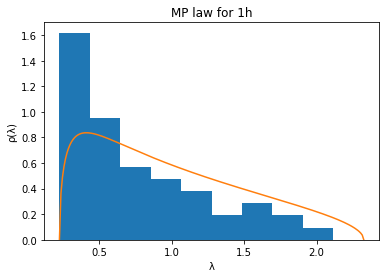

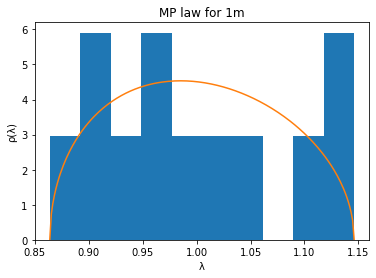

In [66]:
eigval_1h, eigvec_1h = np.linalg.eig(cormat_1h)
eigval_1m, eigvec_1m = np.linalg.eig(cormat_1m)

Q_1h = 3.6289
Q_1m = 200.8969

lambda_min_1h, lambda_max_1h = lambda_min_max(Q_1h)
lambda_min_1m, lambda_max_1m = lambda_min_max(Q_1m)

x_1h = np.arange(lambda_min_1h, lambda_max_1h, (lambda_max_1h - lambda_min_1h)/200)
x_1m = np.arange(lambda_min_1m, lambda_max_1m, (lambda_max_1m - lambda_min_1m)/200)
x_1h = np.append(x_1h, lambda_max_1h)
x_1m = np.append(x_1m, lambda_max_1m)

y_1h = [marcenko_pastur(Q_1h, x) for x in x_1h]
y_1m = [marcenko_pastur(Q_1m, x) for x in x_1m]

new_figure()
plt.hist(eigval_1h, range = (lambda_min_1h, lambda_max_1h), density = True)
plt.plot(x_1h, y_1h)
plt.xlabel('\u03BB')
plt.ylabel('\u03C1(\u03BB)')
plt.title('MP law for 1h')

new_figure()
plt.hist(eigval_1m, range = (lambda_min_1m, lambda_max_1m), density = True)
plt.plot(x_1m, y_1m)
plt.xlabel('\u03BB')
plt.ylabel('\u03C1(\u03BB)')
plt.title('MP law for 1m')

In [73]:
noise_1h = []
signal_1h = []
noise_1m = []
signal_1m = []

for eigval in eigval_1h:
    if (eigval < lambda_max_1h):
        noise_1h.append(eigval)
    else:
        signal_1h.append(eigval)
        
for eigval in eigval_1m:
    if (eigval < lambda_max_1m):
        noise_1m.append(eigval)
    else:
        signal_1m.append(eigval)
        
norm_noise_1h = [lambda_i / sum(noise_1h) * len(noise_1h) for lambda_i in noise_1h]
norm_noise_1m = [lambda_i / sum(noise_1m) * len(noise_1m) for lambda_i in noise_1m]

diagonal_1h = replace_noise(eigval_1h, norm_noise_1h, lambda_max_1h)
diagonal_1m = replace_noise(eigval_1m, norm_noise_1m, lambda_max_1m)

denoised_1h = eigval_1h * diagonal_1h * eigval_1h.T
denoised_1m = eigval_1m * diagonal_1m * eigval_1m.T

print('denoised_1h:\n', denoised_1h)
print('\n')
print('denoised_1m:\n', denoised_1m)

denoised_1h:
 [2.98713225e+04 2.28617863e+02 5.96677055e+01 3.87315328e+01
 3.56907417e+01 2.01573144e+01 1.53347226e+01 1.27073873e+01
 9.05967434e+00 6.86360561e+00 5.65394379e+00 4.73264931e+00
 3.71816946e+00 3.46459565e+00 2.69223422e+00 2.10153695e+00
 2.01180969e+00 1.68396685e+00 1.42879538e+00 1.28594847e+00
 1.10967562e+00 8.80889990e-01 9.70234157e-01 7.67542494e-01
 6.56144648e-01 6.14676280e-01 4.97560377e-01 4.58833406e-01
 4.00036105e-01 3.51780725e-01 3.06280527e-01 2.52592130e-01
 2.22437602e-01 1.87519259e-01 1.76671024e-01 1.43020861e-01
 1.37658048e-01 1.23492212e-01 1.10187781e-01 9.52195409e-02
 8.55965253e-02 7.93883339e-02 7.16121133e-02 5.87848439e-02
 5.30328891e-02 5.09079920e-02 4.65363384e-02 4.12061858e-02
 3.56414866e-02 3.24085163e-02 2.77021643e-02 2.23286040e-02
 1.81916993e-02 1.69347469e-02 1.65330867e-02 1.52228147e-02
 1.30066999e-02 1.16635246e-02 3.98138421e-06 7.63284402e-06
 9.27412323e-03 8.47151834e-03 1.70982986e-05 2.48901378e-05
 7.3863334